# Setting

Run: ./eval_logits.py

We evaluate on wikitext text dataset, text 2179 sentences, with 418776 tokens
Saturate event: the max logits index doesn't change for deep layers and the same as last prediction
For each token we compute the saturate event happened on which layer





# GPT2 result

average Saturate Event **76741/418776**, Percentage:**0.18325197606497368**
Saturate event count for each layer[ 27840.   1350.   2103.   3551.   5116.   5654.  4797.  8554.   9080. 8879.   5894. 335958.]

# Aligned GPT2 result

Average Saturate Event 199820/418776, Percentage:0.47715376217980193
Saturate event count for each layer[ 44636.  21181.  11975.  11000.   9946.  16599.  19712.  13938.  13235. 16897.  20701. 218956.]

# Multiexit GPT2 Result
Average Saturate Event 167038/418776, Percentage:0.39887258332131775
Saturate event count for each layer[ 98533.  17654.  10208.   4073.   3269.   2046.   1805.   4178.   4831.
   8537.  14071. 249571.]

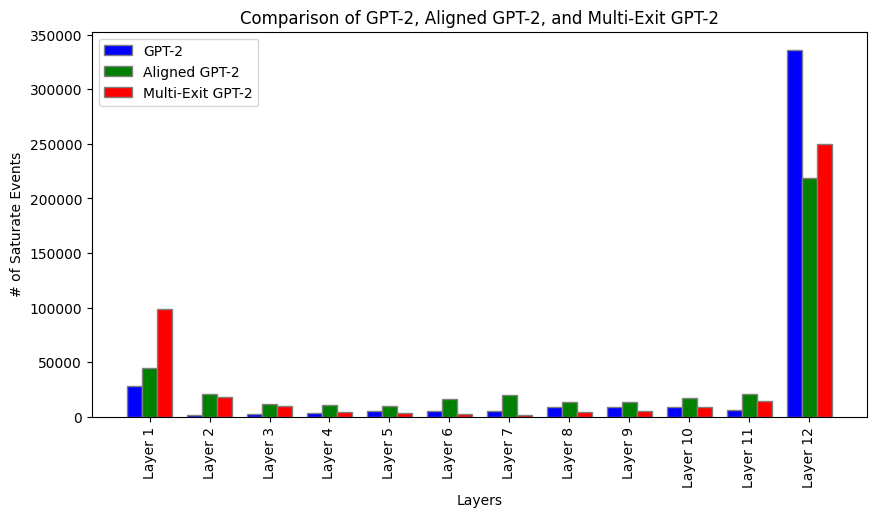

In [22]:
import matplotlib.pyplot as plt
import numpy as np

# Data
gpt2 = [27840, 1350, 2103, 3551, 5116, 5654, 4797, 8554, 9080, 8879, 5894, 335958]
aligned_gpt2 = [44636, 21181, 11975, 11000, 9946, 16599, 19712, 13938, 13235, 16897, 20701, 218956]
multiexit_gpt2 = [ 98533,  17654,  10208,   4073,   3269,   2046,   1805,   4178,   4831,
   8537,  14071, 249571]

# Labels for the x-axis
labels = [f'Layer {i+1}' for i in range(len(gpt2))]

# Number of bars
n = len(gpt2)

# Bar width
bar_width = 0.25

# Positions of the bars on the x-axis
r1 = np.arange(n)
r2 = [x + bar_width for x in r1]
r3 = [x + bar_width for x in r2]

# Create the plot
plt.figure(figsize=(10, 5))

plt.bar(r1, gpt2, color='blue', width=bar_width, edgecolor='grey', label='GPT-2')
plt.bar(r2, aligned_gpt2, color='green', width=bar_width, edgecolor='grey', label='Aligned GPT-2')
plt.bar(r3, multiexit_gpt2, color='red', width=bar_width, edgecolor='grey', label='Multi-Exit GPT-2')

# Add labels
plt.xlabel('Layers')
plt.ylabel('# of Saturate Events')
plt.title('Comparison of GPT-2, Aligned GPT-2, and Multi-Exit GPT-2')
plt.xticks([r + bar_width for r in range(n)], labels,rotation=90)

# Add legend
plt.legend()

# Show the plot
plt.show()



{-11: 3733, -10: 1258, -9: 1420, -8: 1266, -7: 1388, -6: 1572, -5: 1608, -4: 1883, -3: 2613, -2: 3616, -1: 6345, 0: 225967, 1: 20781, 2: 17812, 3: 14921, 4: 16732, 5: 21769, 6: 15320, 7: 12106, 8: 10902, 9: 9256, 10: 12619, 11: 13889}


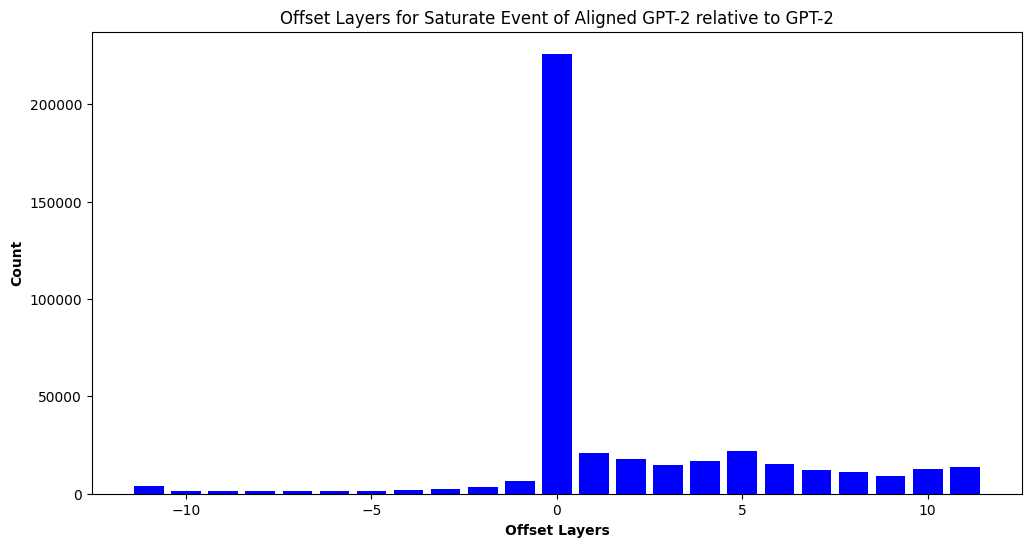

In [23]:
# we also want to evaluate for specific token, whether the saturate layer is moving shallower for aligned GPT-2

# load alignedgpt2_saturate_event.npy
import numpy as np
import matplotlib.pyplot as plt

gpt2_saturate_event = np.load('gpt2_saturate_event.npy')
alignedgpt2_saturate_event = np.load('alignedgpt2_saturate_event.npy')

offset_layers = np.array(gpt2_saturate_event) - np.array(alignedgpt2_saturate_event)

# collect offset_layers to histogram
unique, counts = np.unique(offset_layers, return_counts=True)

offset = dict(zip(unique, counts))
print(offset)

# plot offset dict
plt.figure(figsize=(12, 6))
plt.bar(offset.keys(), offset.values(), color='blue')
plt.xlabel('Offset Layers', fontweight='bold')
plt.ylabel('Count', fontweight='bold')
plt.title('Offset Layers for Saturate Event of Aligned GPT-2 relative to GPT-2')
plt.show()




{-11: 4038, -10: 674, -9: 1082, -8: 1290, -7: 1124, -6: 1647, -5: 1744, -4: 2648, -3: 3477, -2: 4561, -1: 4245, 0: 252737, 1: 12577, 2: 8564, 3: 5976, 4: 7957, 5: 5568, 6: 4864, 7: 8237, 8: 8052, 9: 10553, 10: 14743, 11: 52418}


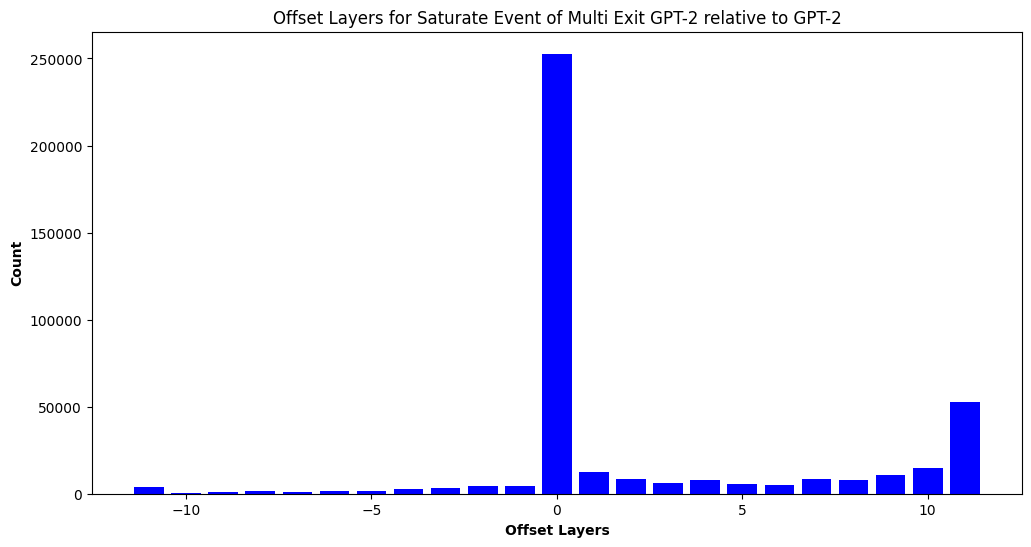

In [24]:
# we also want to evaluate for specific token, whether the saturate layer is moving shallower for aligned GPT-2

# load alignedgpt2_saturate_event.npy
import numpy as np
import matplotlib.pyplot as plt

gpt2_saturate_event = np.load('gpt2_saturate_event.npy')
multiexit_gpt2_saturate_event = np.load('multiexitgpt2_saturate_event.npy')

offset_layers = np.array(gpt2_saturate_event) - np.array(multiexit_gpt2_saturate_event)

# collect offset_layers to histogram
unique, counts = np.unique(offset_layers, return_counts=True)

offset = dict(zip(unique, counts))
print(offset)

# plot offset dict
plt.figure(figsize=(12, 6))
plt.bar(offset.keys(), offset.values(), color='blue')
plt.xlabel('Offset Layers', fontweight='bold')
plt.ylabel('Count', fontweight='bold')
plt.title('Offset Layers for Saturate Event of Multi Exit GPT-2 relative to GPT-2')
plt.show()

{-11: 21227, -10: 10326, -9: 8781, -8: 6930, -7: 6628, -6: 6032, -5: 6987, -4: 6658, -3: 7019, -2: 7594, -1: 15048, 0: 220067, 1: 15511, 2: 10784, 3: 9512, 4: 8649, 5: 11879, 6: 8077, 7: 5406, 8: 5570, 9: 6330, 10: 7221, 11: 6540}


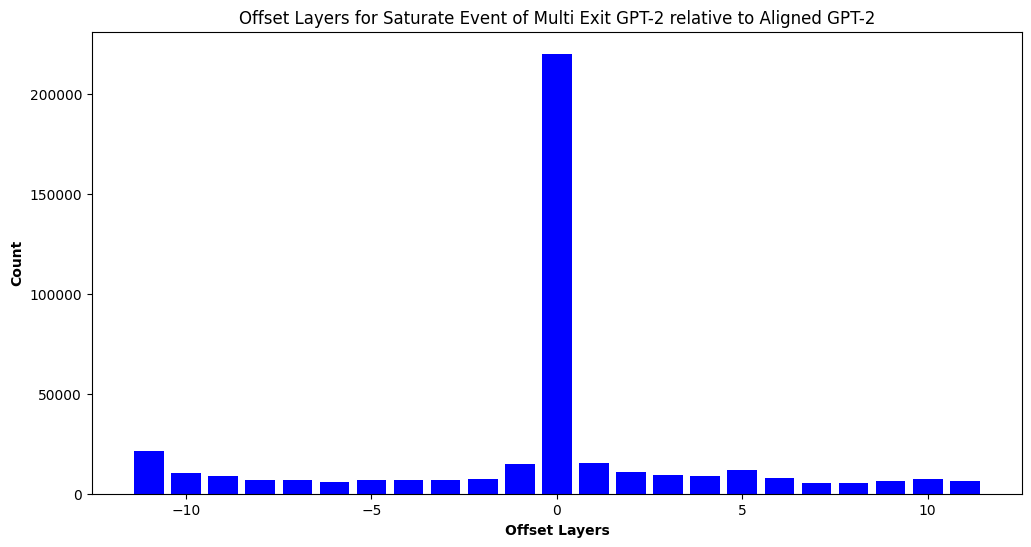

In [25]:
import numpy as np
import matplotlib.pyplot as plt


alignedgpt2_saturate_event = np.load('alignedgpt2_saturate_event.npy')
multiexit_gpt2_saturate_event = np.load('multiexitgpt2_saturate_event.npy')

offset_layers = np.array(multiexit_gpt2_saturate_event) - np.array(alignedgpt2_saturate_event)

# collect offset_layers to histogram
unique, counts = np.unique(offset_layers, return_counts=True)

offset = dict(zip(unique, counts))
print(offset)

# plot offset dict
plt.figure(figsize=(12, 6))
plt.bar(offset.keys(), offset.values(), color='blue')
plt.xlabel('Offset Layers', fontweight='bold')
plt.ylabel('Count', fontweight='bold')
plt.title('Offset Layers for Saturate Event of Multi Exit GPT-2 relative to Aligned GPT-2')
plt.show()